In [1]:
import deepxde as dde 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from defaults import DEFAULTS
from train import bc, ic, geomtime, burgers_equation, gen_testdata

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
influence_arrs = np.load("./model_zoo/adam_10000_best/influences.npz")
influences = influence_arrs["influences"]
new_train_points = influence_arrs["new_train_points"]
OG_train_points = influence_arrs["OG_train_points"]

In [3]:
summed_abs_influences = np.abs(influences).sum(axis=0)
top_idx = np.argsort(summed_abs_influences)[::-1]

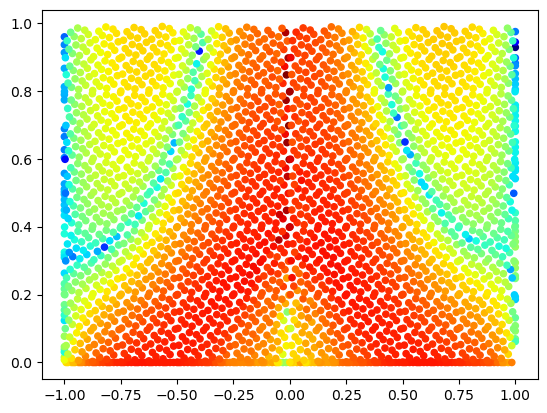

In [4]:
plt.scatter(*OG_train_points.T, c=np.log(np.abs(influences).sum(axis=1)), cmap="jet", s=20)

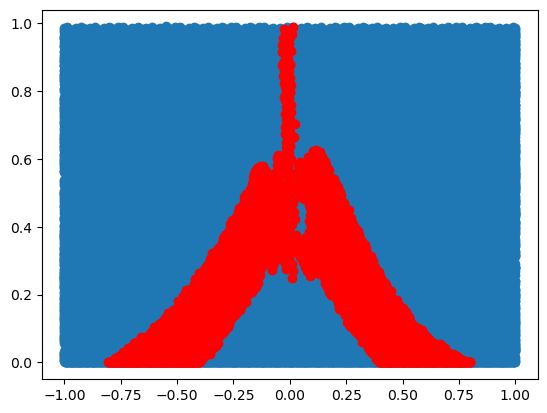

In [5]:
plt.scatter(*new_train_points.T)
plt.scatter(*(new_train_points[top_idx[: int(len(OG_train_points) * 0.90)]]).T, c= 'r')

(-1.0, 1.0)

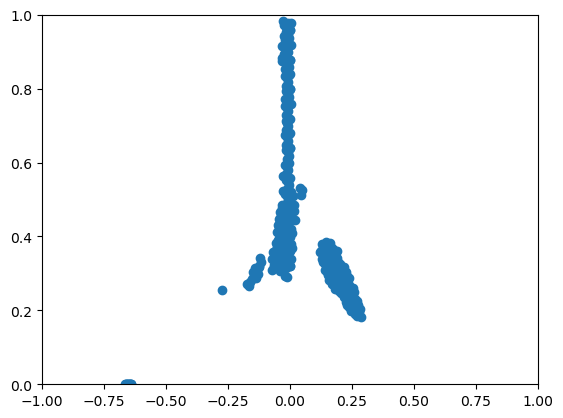

In [6]:
plt.scatter(*new_train_points[top_idx[: int(len(OG_train_points) * 0.1)]].T)
plt.ylim((0,1))
plt.xlim((-1,1))

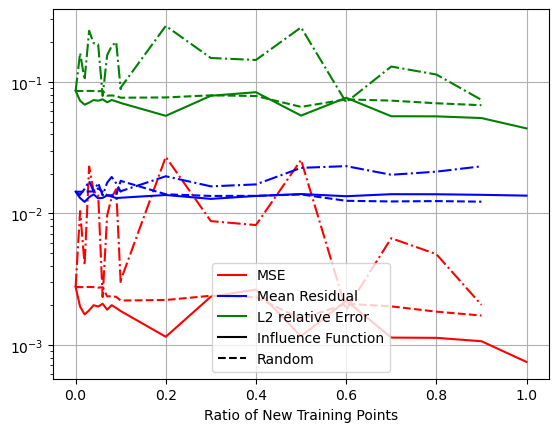

In [7]:
df = pd.read_csv("./model_zoo/adam_10000_best/metrics copy.csv", index_col=0)
df_rar = pd.read_csv("./model_zoo/adam_10000_best/metrics_RAR.csv", index_col=0)
df_rar["model"] = "rar"

df = pd.concat([df, df_rar])

df=df.loc[df['model_version'] == 'full_epochs']

fig, ax = plt.subplots()
if_model = df.loc[df['model'] == 'if']
random_model = df.loc[df['model'] == 'random']
rar = df.loc[df["model"] == "rar"]

ax.plot(if_model['ratio'], if_model['mse'], label='MSE', c = 'r', linestyle='-')
ax.plot(random_model['ratio'], random_model['mse'],c = 'r', linestyle='--')
ax.plot(rar['ratio'], rar['mse'],c = 'r', linestyle='-.')


ax.plot(if_model['ratio'], if_model['mean_residual'], label='Mean Residual', c = 'b', linestyle='-')
ax.plot(random_model['ratio'], random_model['mean_residual'], c = 'b', linestyle='--')
ax.plot(rar['ratio'], rar['mean_residual'],c = 'b', linestyle='-.')

ax.plot(if_model['ratio'], if_model['l2_relative_error'], label='L2 relative Error', c = 'g', linestyle='-')
ax.plot(random_model['ratio'], random_model['l2_relative_error'], c = 'g', linestyle='--')
ax.plot(rar['ratio'], rar['l2_relative_error'],c = 'g', linestyle='-.')

ax.plot([0], [0], linestyle='-', c='k', label='Influence Function')
ax.plot([0], [0], linestyle='--', c='k', label='Random')

ax.set_xlabel('Ratio of New Training Points')
ax.set_yscale('log')
ax.grid()
ax.legend()

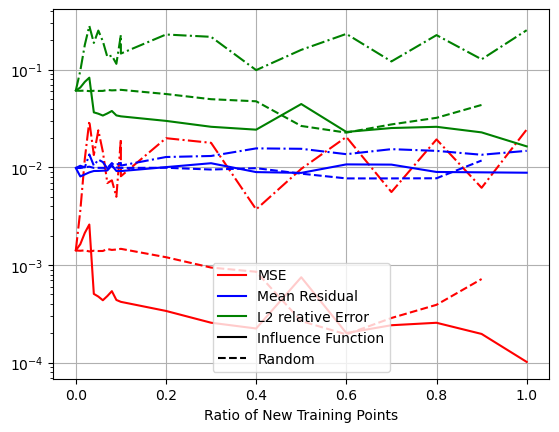

In [29]:
df = pd.read_csv("./model_zoo/adam_50000_best/metrics copy.csv", index_col=0)
df_rar = pd.read_csv("./model_zoo/adam_50000_best/metrics_RAR.csv", index_col=0)
df_rar["model"] = "rar"

df = pd.concat([df, df_rar])

df=df.loc[df['model_version'] == 'full_epochs']

fig, ax = plt.subplots()
if_model = df.loc[df['model'] == 'if']
random_model = df.loc[df['model'] == 'random']
rar = df.loc[df["model"] == "rar"]

ax.plot(if_model['ratio'], if_model['mse'], label='MSE', c = 'r', linestyle='-')
ax.plot(random_model['ratio'], random_model['mse'],c = 'r', linestyle='--')
ax.plot(rar['ratio'], rar['mse'],c = 'r', linestyle='-.')


ax.plot(if_model['ratio'], if_model['mean_residual'], label='Mean Residual', c = 'b', linestyle='-')
ax.plot(random_model['ratio'], random_model['mean_residual'], c = 'b', linestyle='--')
ax.plot(rar['ratio'], rar['mean_residual'],c = 'b', linestyle='-.')

ax.plot(if_model['ratio'], if_model['l2_relative_error'], label='L2 relative Error', c = 'g', linestyle='-')
ax.plot(random_model['ratio'], random_model['l2_relative_error'], c = 'g', linestyle='--')
ax.plot(rar['ratio'], rar['l2_relative_error'],c = 'g', linestyle='-.')

ax.plot([0], [0], linestyle='-', c='k', label='Influence Function')
ax.plot([0], [0], linestyle='--', c='k', label='Random')

ax.set_xlabel('Ratio of New Training Points')
ax.set_yscale('log')
ax.grid()
ax.legend()

In [9]:
df

,model,mean_residual,l2_relative_error,mse,ratio,epoch,model_version
0,if,0.009876,0.061167,0.001412,0.00,49000.0,full_epochs
3,random,0.009876,0.061167,0.001412,0.00,49000.0,full_epochs
6,if,0.008096,0.065868,0.001637,0.01,49000.0,full_epochs
9,random,0.009869,0.060961,0.001403,0.01,49000.0,full_epochs
12,if,0.008485,0.075251,0.002137,0.02,49000.0,full_epochs
...,...,...,...,...,...,...,...
45,rar,0.015527,0.160073,0.009671,0.50,49000.0,full_epochs
48,rar,0.013677,0.233260,0.020535,0.60,49000.0,full_epochs
51,rar,0.015394,0.121815,0.005600,0.70,49000.0,full_epochs
54,rar,0.014787,0.226544,0.019370,0.80,49000.0,full_epochs


In [10]:
influences.shape 

(2780, 13900)

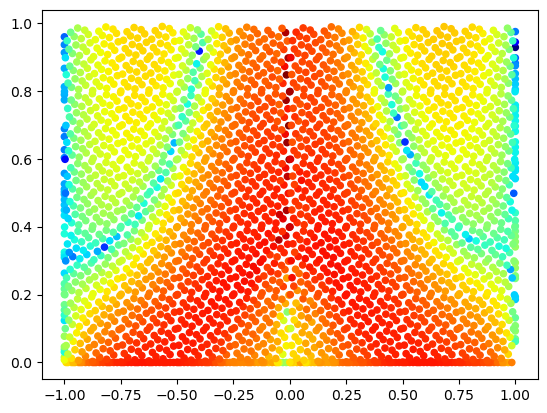

In [11]:
plt.scatter(*OG_train_points.T, c=np.log(np.abs(influences).sum(axis=1)), cmap="jet", s=20)

In [22]:
data = dde.data.TimePDE(
    geomtime,
    burgers_equation,
    [bc, ic],
    num_domain=2000
)
net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

Compiling model...
'compile' took 0.000623 s



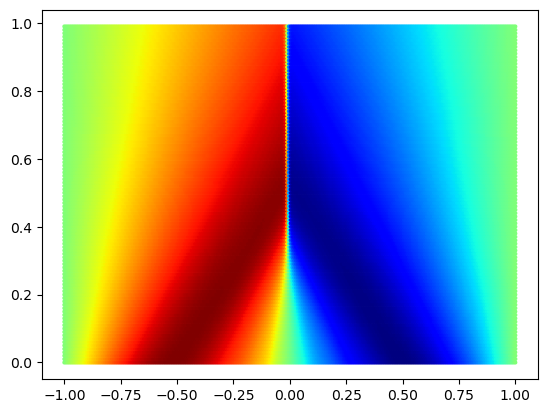

MSE: 3.15e-03
mean residual: 1.88e-02


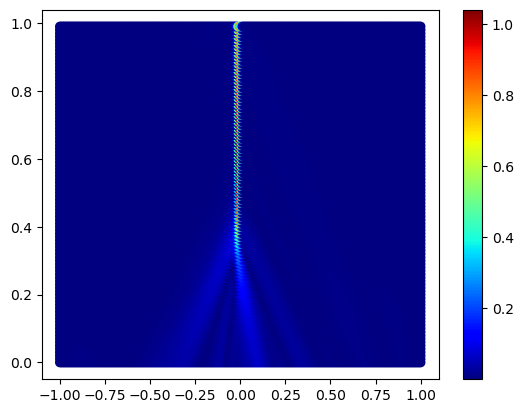

In [23]:
model_if = model 
test_x, test_y = gen_testdata()

train_x_if = np.load("./model_zoo/train_x.npy")
model_if.restore("./model_zoo/adam_10000_best.pt")
plt.scatter(*test_x.T, c=model.predict(test_x), cmap='jet', s=4)
plt.show()
plt.scatter(*test_x.T, c=np.abs(model.predict(test_x) - test_y), cmap='jet')
plt.colorbar()
(np.square(model.predict(test_x) - test_y)).mean()
print(f"MSE: {(np.square(model.predict(test_x) - test_y)).mean():.2e}")
residual = model.predict(test_x, operator=burgers_equation)
print(f"mean residual: {np.abs(residual).mean():.2e}")

In [24]:
import torch 
ratio = 0.1 

X = data.geom.random_points(100_000)
Y = np.abs(model.predict(X, operator=burgers_equation))[:, 0]
topk = torch.topk(torch.tensor(Y), int(len(data.train_x_all) * ratio), dim=0)[1]

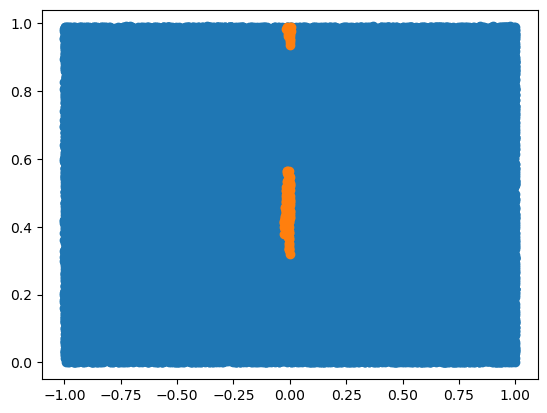

In [28]:
plt.scatter(*X.T)
plt.scatter(*X[topk].T)

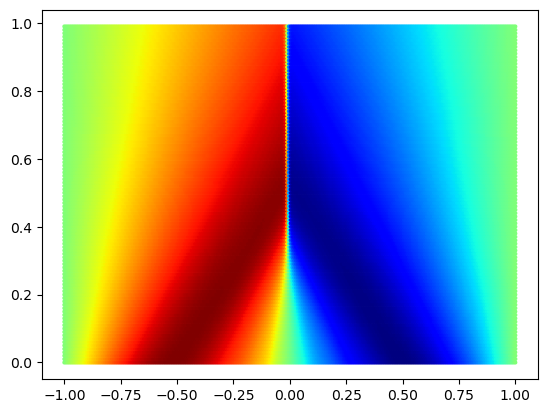

MSE: 3.15e-03
mean residual: 1.88e-02


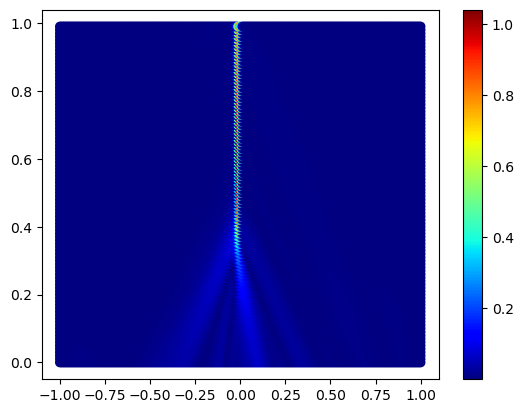

In [26]:
model_if = model 
train_x_if = np.load("./model_zoo/train_x.npy")
model_if.restore("./model_zoo/adam_10000_best.pt")
plt.scatter(*test_x.T, c=model.predict(test_x), cmap='jet', s=4)
plt.show()
plt.scatter(*test_x.T, c=np.abs(model.predict(test_x) - test_y), cmap='jet')
plt.colorbar()
(np.square(model.predict(test_x) - test_y)).mean()
print(f"MSE: {(np.square(model.predict(test_x) - test_y)).mean():.2e}")
residual = model.predict(test_x, operator=burgers_equation)
print(f"mean residual: {np.abs(residual).mean():.2e}")

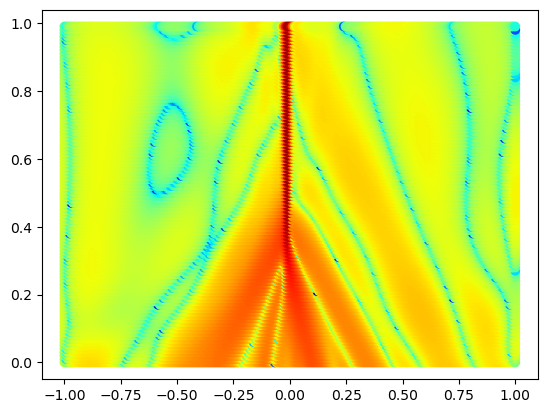

In [39]:
plt.scatter(*test_x.T, c=np.log(np.abs(model.predict(test_x) - test_y)), cmap='jet')

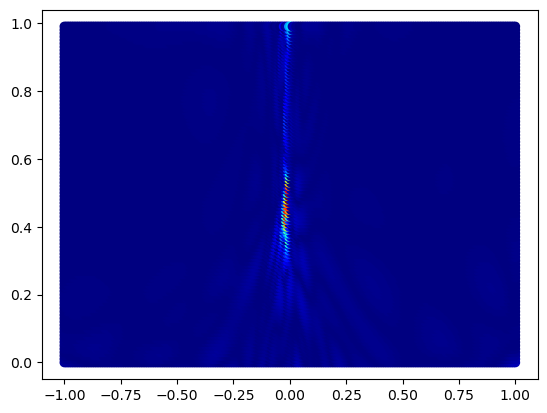

In [40]:
plt.scatter(*test_x.T, c=np.abs(residual), cmap='jet')

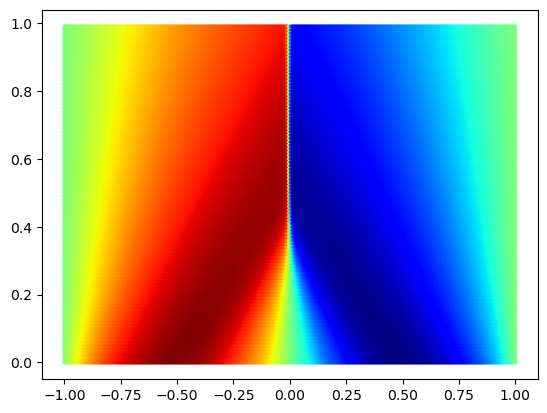

MSE: 3.07e-03
mean residual: 3.94e-02


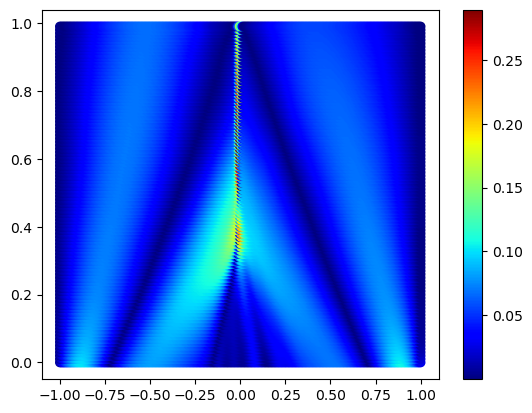

In [87]:
model_if = model 
train_x_if = np.load("./model_zoo/train_x.npy")
model_if.restore("./model_zoo/adam_10000_best/finetuned_random_add_influential_data_0.25-10000.pt")
plt.scatter(*test_x.T, c=model.predict(test_x), cmap='jet', s=4)
plt.show()
plt.scatter(*test_x.T, c=np.abs(model.predict(test_x) - test_y), cmap='jet')
plt.colorbar()
(np.square(model.predict(test_x) - test_y)).mean()
print(f"MSE: {(np.square(model.predict(test_x) - test_y)).mean():.2e}")
residual = model.predict(test_x, operator=burgers_equation)
print(f"mean residual: {np.abs(residual).mean():.2e}")